# Quantum Harmonic Osscilator

\begin{equation}
    {\cal H}= \frac{p^2}{2 m} + \frac{1}{2} m \omega ^2 x^2
\end{equation}

In [20]:
#Pkg.update();
#Pkg.add("PyPlot");
#Pkg.update()
#Pkg.add("Roots")
using Roots;
using PyPlot;

In [49]:
function GenerateHermite(n)
    Hermite=Function[]
    
    push!(Hermite,x->1);
    push!(Hermite,x->2*x);
    
    for ni in 3:n
        push!(Hermite,x->2.*x.*Hermite[ni-1](x).-2.*n.*Hermite[ni-2](x))
    end
    return Hermite
end

GenerateHermite (generic function with 1 method)

In [ ]:
Hermite=GenerateHermite(5)

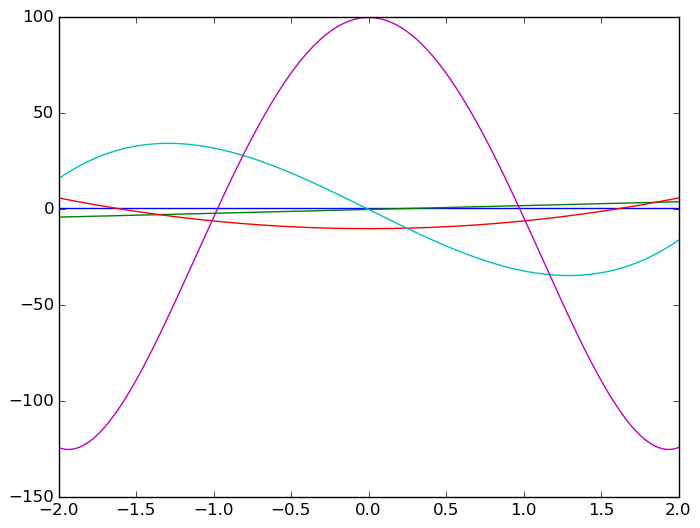

In [55]:
x=collect(-2:.01:2);
for j in 1:5
    plot(x,map(Hermite[j],x))
end

In [83]:
m=1
ω=1
ħ=1

Ψ(n,x)=1/sqrt(factorial(n)*2^n)*(m*ω/(ħ*π))^(1/4)*exp(-m*ω*x^2/(2*ħ))*Hermite[n](sqrt(m*ω/ħ)*x)

Ψ (generic function with 1 method)

In [112]:
zeds=Array{Array{Float64}}(1)
zeds[1]=[]
for j in 2:4
    push!(zeds,fzeros(y->Ψ(j,y),-3,3))
end
zeds

4-element Array{Array{Float64,N},1}:
 Float64[]                                
 [-0.0]                                   
 [-1.5811388300841898,1.5811388300841898] 
 [-2.23606797749979,-0.0,2.23606797749979]

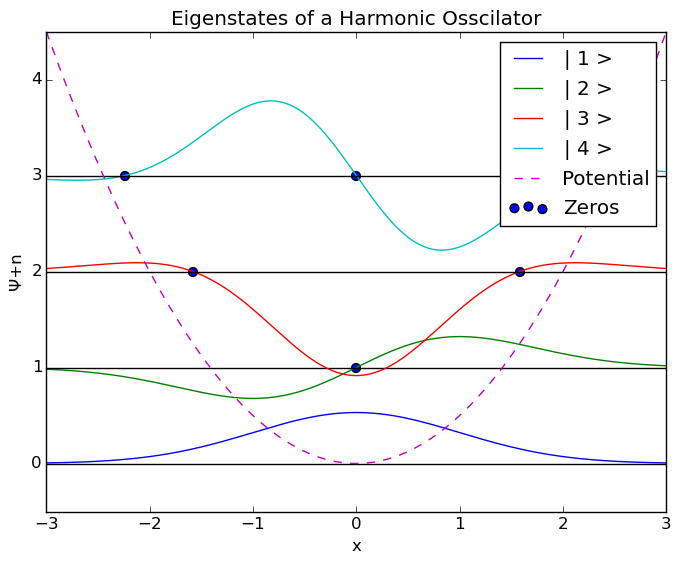

In [126]:
x=collect(-3:.01:3)
for j in 1:4
    plot(x,map(y->Ψ(j,y),x)+j-1,label="| $j >") 
    plot(x,(j-1)*ones(x),color="black")
    scatter(zeds[j],(j-1)*ones(zeds[j]),marker="o",s=40)
end
scatter([],[],marker="o",s=40,label="Zeros")
plot(x,.5*m*ω^2*x.^2,linestyle="--",label="Potential")
xlabel("x")
ylabel("Ψ+n")
title("Eigenstates of a Harmonic Osscilator")
legend()
xlim(-3,3);
ylim(-.5,4.5);

![My first four Eigenstates](Images/QHO/eigenstates.png)